# This alternative implements from_logits=True for loss function during compilation of the model, then outputs a softmax manually

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

RANDOM_STATE = 1234
np.random.seed(2)

In [2]:
train = pd.read_csv("D:/githubrepo/ML_models/Work/digits/Data/train.csv")
test = pd.read_csv("D:/githubrepo/ML_models/Work/digits/Data/test.csv")

In [3]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

del train

In [4]:
X_train = X_train / 255.0
test = test / 255.0

In [5]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [6]:
y_train = pd.get_dummies(data=y_train).astype(int)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=RANDOM_STATE)

#### Architecture based on LeNet-5, with Conv->MaxPool->Dropout->Conv->MaxPool->Dropout->Flatten->Dense->Dense

#### Padding is set as Same (=1). First Conv's stride is 1,1, while the second is 2,2

In [8]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='linear'))

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-8), 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size=50, epochs=2, validation_data=(X_val, y_val)) #validation_data=(X_val, y_val)

Epoch 1/2
756/756 [==============================] - 45s 58ms/step - loss: 0.2095 - accuracy: 0.9342 - val_loss: 0.0760 - val_accuracy: 0.9743
Epoch 2/2
756/756 [==============================] - 47s 62ms/step - loss: 0.0701 - accuracy: 0.9784 - val_loss: 0.0517 - val_accuracy: 0.9843


In [11]:
yhat = model.predict(X_train)
yhat = tf.nn.softmax(yhat)

1182/1182 [==============================] - 8s 7ms/step


In [14]:
yhat = yhat.numpy()

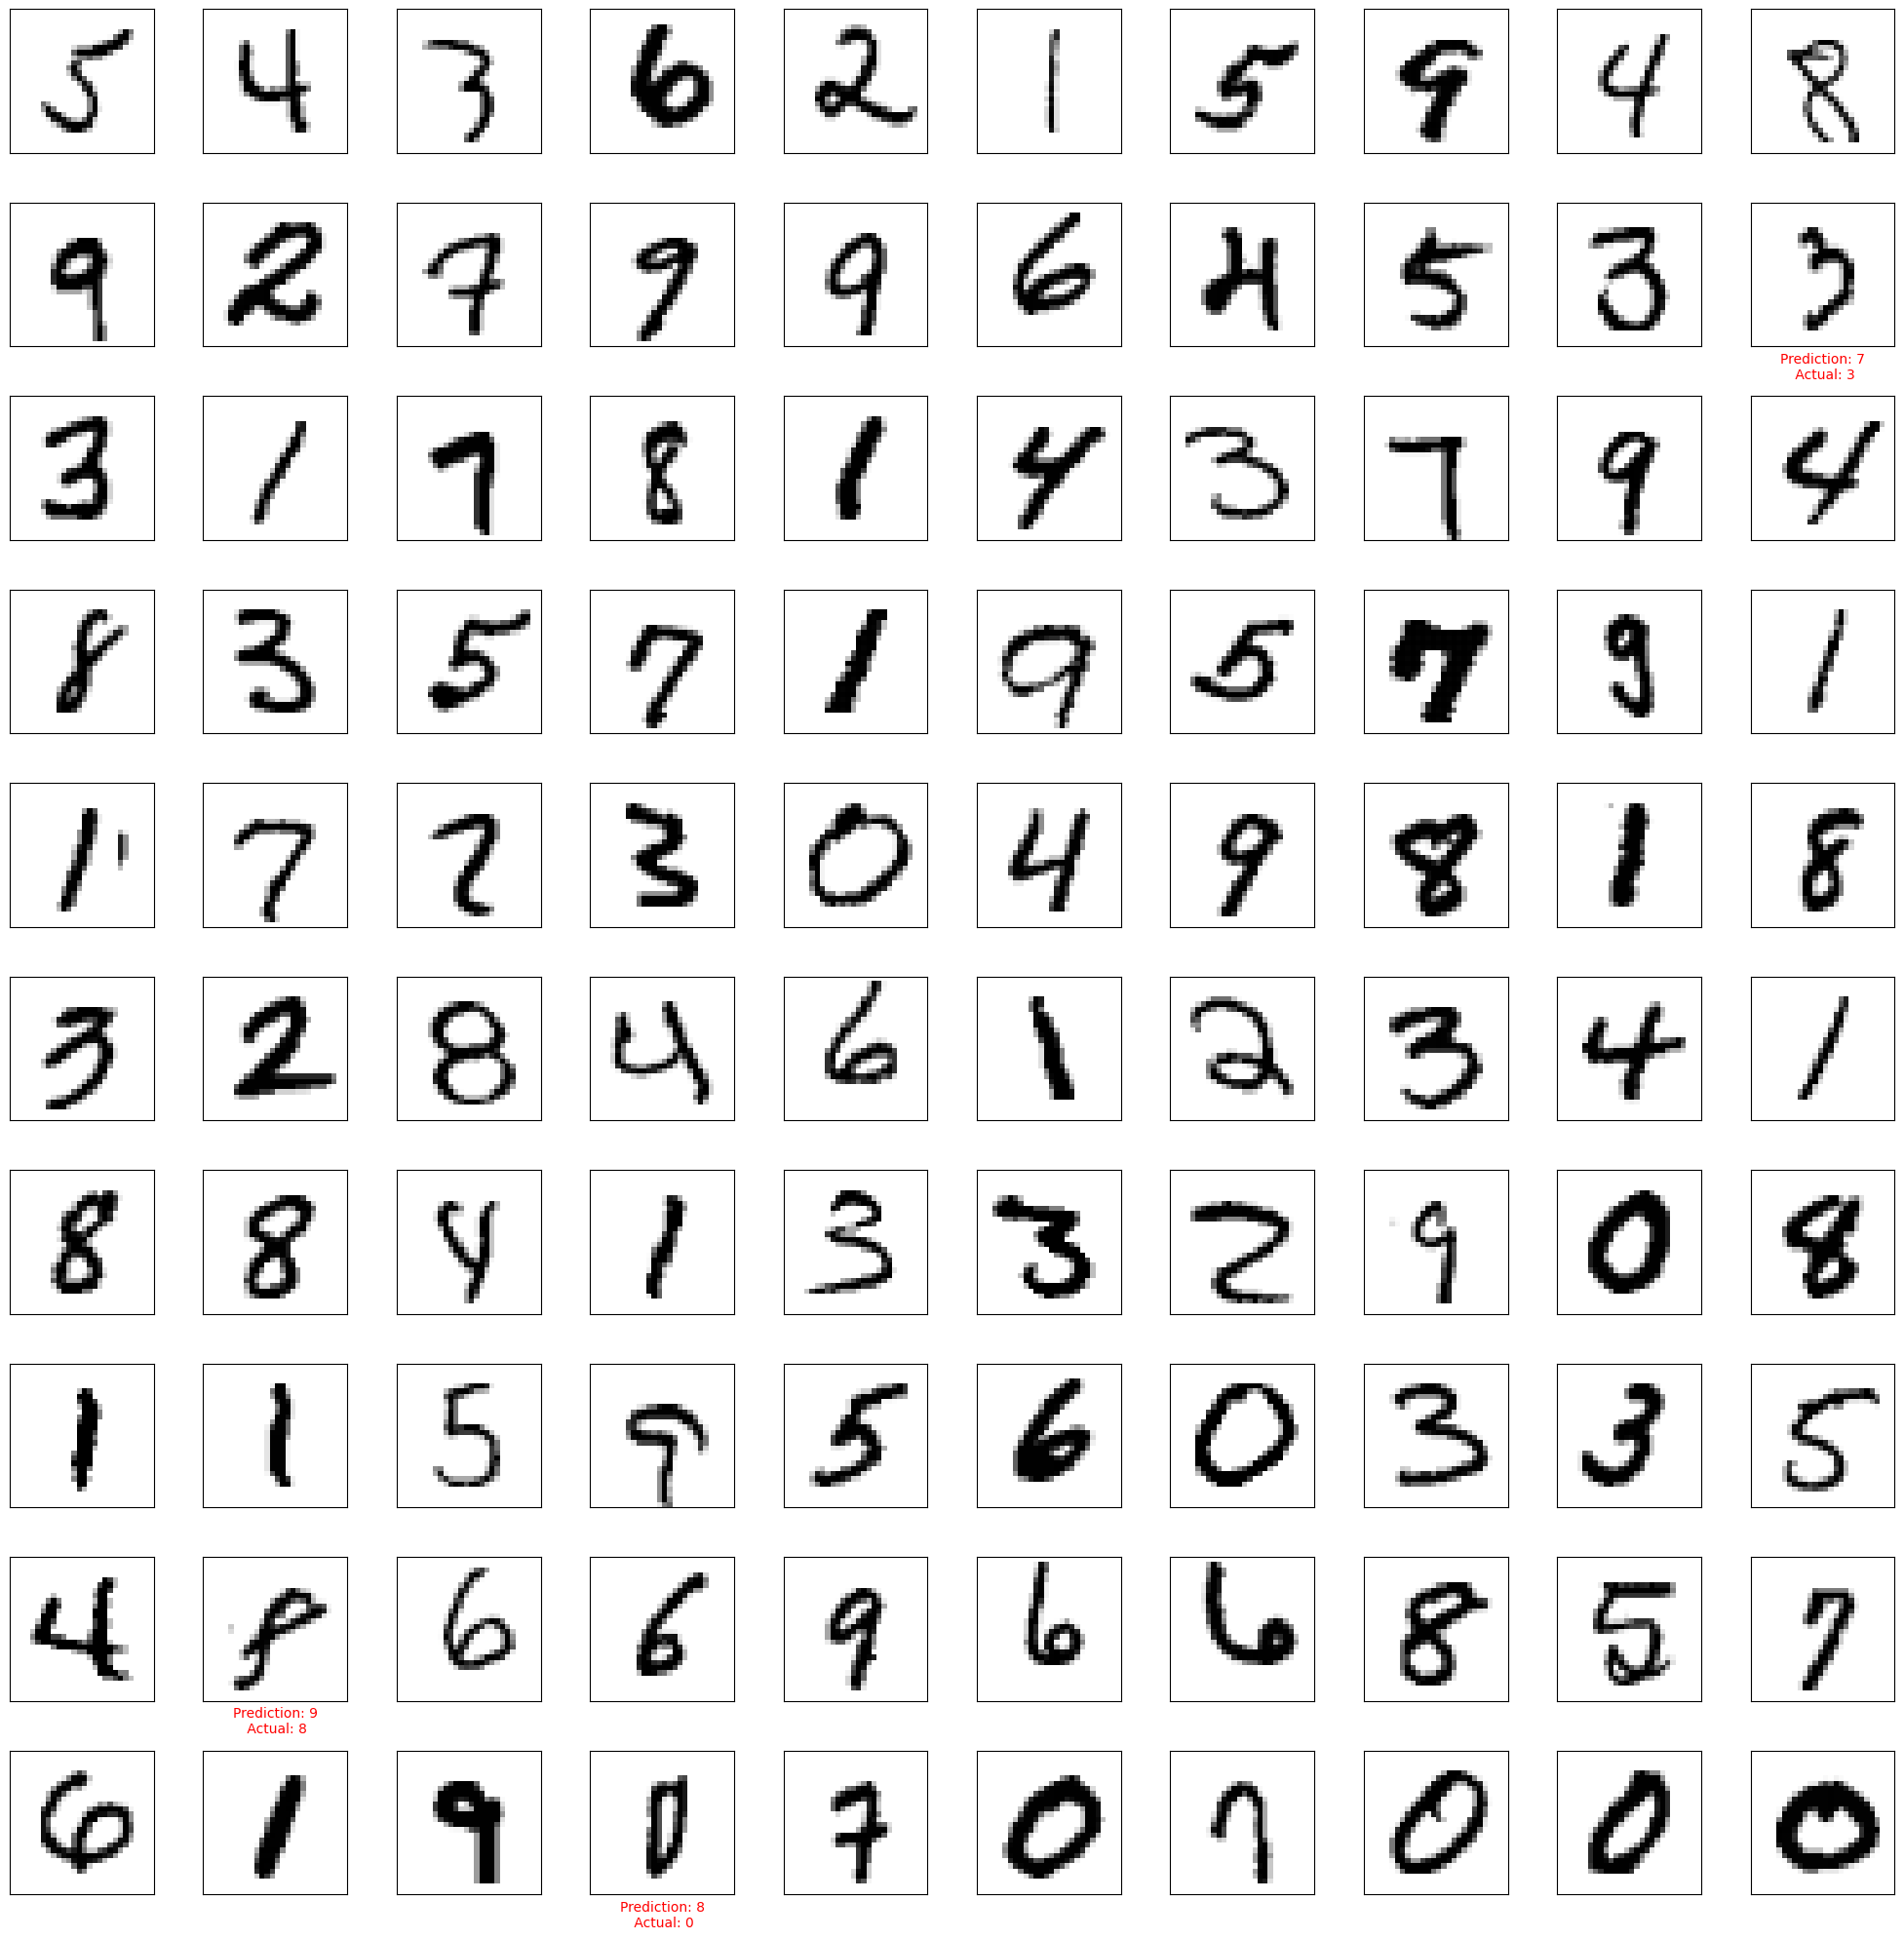

In [15]:
plt.figure(figsize=(20, 20))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  if (y_train.iloc[i].argmax() != yhat[i].argmax()):
    plt.xlabel(f"Prediction: {yhat[i].argmax()}\n Actual: {y_train.iloc[i].argmax()}", color='red')
plt.tight_layout()
plt.show()